In [84]:
import seaborn as sns
import pandas as pd
import json
from urllib.request import Request, urlopen
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as plt

In [20]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (12,3)})

In [59]:
def guru_data(stock, subject):
    api_key = '73142da8657cc5dfa541b546d1560131:4886c27790bc76bd5e076340a403ade5'
    url = 'https://api.gurufocus.com/public/user/%s/stock/%s/%s' % (api_key, stock, subject)
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    response = urlopen(req)
    content = response.read()
    data = json.loads(content.decode('utf8'))
    return data[subject]

# Financials

In [60]:
financials=guru_data('TSM', 'financials')
financials['quarterly'].keys()

dict_keys(['Fiscal Year', 'preliminary', 'income_statement', 'balance_sheet', 'cashflow_statement', 'valuation_ratios', 'valuation_and_quality', 'common_size_ratios', 'per_share_data_array'])

### Income statement

In [65]:
def extract_data(df, key):
    fy = financials['quarterly']['Fiscal Year']
    inc_stmt=pd.DataFrame(data['financials']['quarterly'][key])
    inc_stmt['Fiscal Year'] = fy
    inc_stmt.set_index('Fiscal Year', inplace=True)
    inc_stmt = inc_stmt.astype(float)
    print(list(inc_stmt.columns))
    return inc_stmt

inc_stmt = extract_data(financials, 'income_statement')

['Revenue', 'Cost of Goods Sold', 'Gross Profit', 'Gross Margin %', 'Selling, General, & Admin. Expense', 'Impairment Of Capital Assets', 'Advertising', 'Research & Development', 'Restructuring And Mergern Acquisition', 'Other Operating Expense', 'Operating Income', 'Operating Margin %', 'Interest Income', 'Interest Expense', 'Net Interest Income', 'Other Income (Expense)', 'Non Operating Income', 'Other Income (Minority Interest)', 'Gain on Sale of Security', 'Write Off', 'Pre-Tax Income', 'Tax Provision', 'Tax Rate %', 'Net Income (Continuing Operations)', 'Net Income (Discontinued Operations)', 'Net Income', 'Net Margin %', 'Preferred Dividends', 'EPS (Basic)', 'EPS (Diluted)', 'Shares Outstanding (Diluted Average)', 'Depreciation, Depletion and Amortization', 'EBITDA']


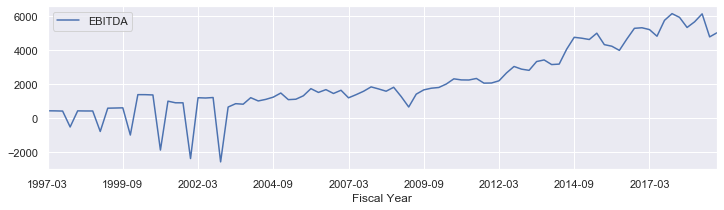

In [70]:
inc_stmt.plot(y='EBITDA');

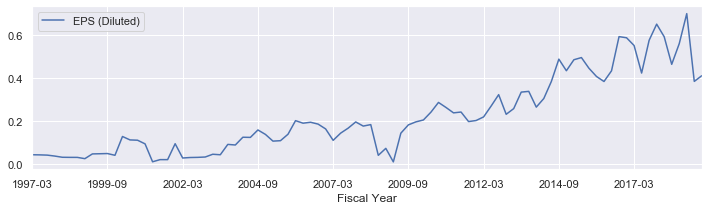

In [67]:
inc_stmt.plot(y='EPS (Diluted)');

In [68]:
ratios = extract_data(financials, 'valuation_ratios')

['PE Ratio', 'Price-to-Owner-Earnings', 'PB Ratio', 'Price-to-Tangible-Book', 'Price-to-Free-Cash-Flow', 'Price-to-Operating-Cash-Flow', 'PS Ratio', 'PEG Ratio', 'EV-to-Revenue', 'EV-to-EBITDA', 'EV-to-EBIT', 'Earnings Yield (Joel Greenblatt) %', 'Forward Rate of Return (Yacktman) %', 'Shiller PE Ratio', 'Dividend Yield %']


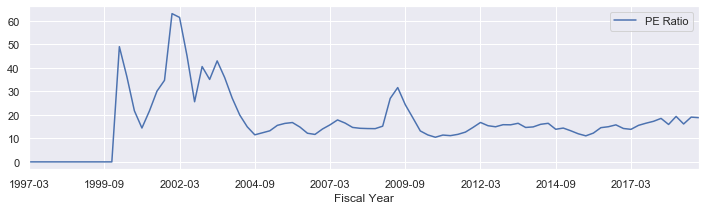

In [73]:
ratios.plot(y='PE Ratio')

In [81]:
stock="XSD"
subject='price'
api_key = '73142da8657cc5dfa541b546d1560131:4886c27790bc76bd5e076340a403ade5'
url = 'https://api.gurufocus.com/public/user/%s/stock/%s/%s' % (api_key, stock, subject)
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
response = urlopen(req)
content = response.read()
data = json.loads(content.decode('utf8'))


In [85]:
data = np.array(data).T

In [86]:
data

array([['02-06-2006', '02-07-2006', '02-08-2006', ..., '10-08-2019',
        '10-09-2019', '10-10-2019'],
       ['25.08', '25.19', '25.67', ..., '86.9', '87.91', '88.79']],
      dtype='<U10')

In [ ]:
    dates = financials['quarterly']['Fiscal Year']
    inc_stmt=pd.DataFrame(data['financials']['quarterly'][key])
    inc_stmt['Fiscal Year'] = fy
    inc_stmt.set_index('Fiscal Year', inplace=True)
    inc_stmt = inc_stmt.astype(float)
    print(list(inc_stmt.columns))
    return inc_stmt
